# Práctica 3 - Segunda prueba

#### Pilar Navarro Ramírez

In [79]:
import pandas as pd

## Preprocesamiento

In [80]:
df_train=pd.read_csv("data/train.csv",na_values=[""])
df_test=pd.read_csv("data/test.csv",na_values=[""])

In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4819 entries, 0 to 4818
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4747 non-null   float64
 1   Nombre        4747 non-null   object 
 2   Ciudad        4747 non-null   object 
 3   Año           4747 non-null   float64
 4   Kilometros    4747 non-null   float64
 5   Combustible   4747 non-null   object 
 6   Tipo_marchas  4747 non-null   object 
 7   Mano          4747 non-null   object 
 8   Consumo       4746 non-null   object 
 9   Motor_CC      4718 non-null   object 
 10  Potencia      4644 non-null   object 
 11  Asientos      4713 non-null   float64
 12  Descuento     659 non-null    float64
 13  Precio_cat    4819 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 527.2+ KB


In [82]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1159 non-null   int64  
 1   Nombre        1159 non-null   object 
 2   Ciudad        1159 non-null   object 
 3   Año           1159 non-null   int64  
 4   Kilometros    1159 non-null   int64  
 5   Combustible   1159 non-null   object 
 6   Tipo_marchas  1159 non-null   object 
 7   Mano          1159 non-null   object 
 8   Consumo       1159 non-null   object 
 9   Motor_CC      1159 non-null   object 
 10  Potencia      1159 non-null   object 
 11  Asientos      1159 non-null   float64
 12  Descuento     155 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 117.8+ KB


In [83]:
df_train.columns = [col.lower() for col in df_train]
df_test.columns = [col.lower() for col in df_test]

df_train_orig = df_train.copy()
df_test_orig = df_test.copy()

del df_train["id"]
del df_test["id"]

In [84]:
df_test.describe()

,año,kilometros,asientos,descuento
count,1159.000000,1159.000000,1159.000000,155.000000
mean,2012.691976,59377.421915,5.257981,24.211613
std,3.609266,35706.375000,0.791723,21.726252
min,1998.000000,600.000000,2.000000,1.040000
25%,2010.000000,35272.500000,5.000000,8.930000
50%,2013.000000,55000.000000,5.000000,14.200000
75%,2016.000000,75000.000000,5.000000,36.815000
max,2019.000000,480000.000000,8.000000,95.380000


In [85]:
df_train.describe()

,año,kilometros,asientos,descuento,precio_cat
count,4747.000000,4.747000e+03,4713.000000,659.000000,4819.000000
mean,2013.571098,5.852946e+04,5.286442,19.304598,3.281386
std,3.114298,1.011517e+05,0.815192,19.752814,1.049861
min,1998.000000,1.710000e+02,0.000000,1.000000,1.000000
25%,2012.000000,3.300000e+04,5.000000,7.630000,3.000000
50%,2014.000000,5.237300e+04,5.000000,11.190000,3.000000
75%,2016.000000,7.200000e+04,5.000000,21.535000,4.000000
max,2019.000000,6.500000e+06,10.000000,99.920000,5.000000


In [86]:
df_train["consumo"].describe()

count          4746
unique          405
top       18.9 kmpl
freq            140
Name: consumo, dtype: object

In [87]:
df_train["potencia"].describe()

count       4644
unique       345
top       74 bhp
freq         200
Name: potencia, dtype: object

In [88]:
df_train["motor_cc"].describe()

count        4718
unique        138
top       1197 CC
freq          484
Name: motor_cc, dtype: object

### Tratamos los datos perdidos

In [89]:
from sklearn import impute

In [90]:
del df_train['descuento']
del df_test['descuento']

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nombre        1159 non-null   object 
 1   ciudad        1159 non-null   object 
 2   año           1159 non-null   int64  
 3   kilometros    1159 non-null   int64  
 4   combustible   1159 non-null   object 
 5   tipo_marchas  1159 non-null   object 
 6   mano          1159 non-null   object 
 7   consumo       1159 non-null   object 
 8   motor_cc      1159 non-null   object 
 9   potencia      1159 non-null   object 
 10  asientos      1159 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 99.7+ KB


In [91]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4819 entries, 0 to 4818
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nombre        4747 non-null   object 
 1   ciudad        4747 non-null   object 
 2   año           4747 non-null   float64
 3   kilometros    4747 non-null   float64
 4   combustible   4747 non-null   object 
 5   tipo_marchas  4747 non-null   object 
 6   mano          4747 non-null   object 
 7   consumo       4746 non-null   object 
 8   motor_cc      4718 non-null   object 
 9   potencia      4644 non-null   object 
 10  asientos      4713 non-null   float64
 11  precio_cat    4819 non-null   int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 451.9+ KB


In [92]:
df_train.describe()

,año,kilometros,asientos,precio_cat
count,4747.000000,4.747000e+03,4713.000000,4819.000000
mean,2013.571098,5.852946e+04,5.286442,3.281386
std,3.114298,1.011517e+05,0.815192,1.049861
min,1998.000000,1.710000e+02,0.000000,1.000000
25%,2012.000000,3.300000e+04,5.000000,3.000000
50%,2014.000000,5.237300e+04,5.000000,3.000000
75%,2016.000000,7.200000e+04,5.000000,4.000000
max,2019.000000,6.500000e+06,10.000000,5.000000


In [93]:
df_train_replaced=df_train.copy()
imputer=impute.SimpleImputer(strategy="most_frequent")
values = imputer.fit_transform([df_train_replaced.asientos.values])
df_train_replaced.asientos.update(pd.Series(values[0]))
df_train_replaced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4819 entries, 0 to 4818
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nombre        4747 non-null   object 
 1   ciudad        4747 non-null   object 
 2   año           4747 non-null   float64
 3   kilometros    4747 non-null   float64
 4   combustible   4747 non-null   object 
 5   tipo_marchas  4747 non-null   object 
 6   mano          4747 non-null   object 
 7   consumo       4746 non-null   object 
 8   motor_cc      4718 non-null   object 
 9   potencia      4644 non-null   object 
 10  asientos      4814 non-null   float64
 11  precio_cat    4819 non-null   int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 451.9+ KB


In [94]:
df_train_replaced=df_train_replaced.dropna()
df_train=df_train.dropna()

In [95]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4001 entries, 0 to 4818
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nombre        4001 non-null   object 
 1   ciudad        4001 non-null   object 
 2   año           4001 non-null   float64
 3   kilometros    4001 non-null   float64
 4   combustible   4001 non-null   object 
 5   tipo_marchas  4001 non-null   object 
 6   mano          4001 non-null   object 
 7   consumo       4001 non-null   object 
 8   motor_cc      4001 non-null   object 
 9   potencia      4001 non-null   object 
 10  asientos      4001 non-null   float64
 11  precio_cat    4001 non-null   int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 406.4+ KB


Separamos el atributo a predecir del resto de atributos en el conjunto de entrenamiento.

In [96]:
cols = [col for col in df_train.columns if col not in ['precio_cat']]    
df_train, df_train_obj= df_train[cols], df_train['precio_cat']
df_train_replaced, df_train_obj_replaced= df_train_replaced[cols], df_train_replaced['precio_cat']

### 'Transformación' de variables categóricas a numéricas

In [97]:
from sklearn.preprocessing import LabelEncoder

categorical=["nombre","ciudad","combustible","tipo_marchas","mano","consumo","motor_cc","potencia"]

df_train_num=df_train.copy()
df_train_num_rpl=df_train_replaced.copy()
df_test_num=df_test.copy()

for atributo in categorical:
    data=pd.read_csv("data/"+atributo+".csv")
    data.columns = [col.lower() for col in data]
    label = LabelEncoder().fit(data[atributo])
    df_train_num[atributo]=label.transform(df_train[atributo])
    df_train_num_rpl[atributo]=label.transform(df_train_replaced[atributo])
    df_test_num[atributo]=label.transform(df_test[atributo])

In [98]:
df_train_num_rpl.describe()

,nombre,ciudad,año,kilometros,combustible,tipo_marchas,mano,consumo,motor_cc,potencia,asientos
count,4057.000000,4057.000000,4057.000000,4.057000e+03,4057.000000,4057.000000,4057.000000,4057.000000,4057.000000,4057.000000,4057.000000
mean,917.404979,4.365541,2013.646290,5.866337e+04,2.333251,0.712842,0.329307,222.104264,50.874291,203.686221,5.284693
std,530.157485,3.010784,3.043546,1.084457e+05,1.502254,0.452492,0.773075,109.783567,41.351198,122.113535,0.806192
min,1.000000,0.000000,1998.000000,1.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.000000,2.000000,2012.000000,3.300000e+04,1.000000,0.000000,0.000000,139.000000,14.000000,75.000000,5.000000
50%,921.000000,4.000000,2014.000000,5.238000e+04,1.000000,1.000000,0.000000,235.000000,37.000000,252.000000,5.000000
75%,1314.000000,7.000000,2016.000000,7.200000e+04,4.000000,1.000000,0.000000,317.000000,74.000000,313.000000,5.000000
max,1875.000000,10.000000,2019.000000,6.500000e+06,4.000000,1.000000,3.000000,429.000000,145.000000,370.000000,10.000000


In [99]:
df_test_num.describe()

,nombre,ciudad,año,kilometros,combustible,tipo_marchas,mano,consumo,motor_cc,potencia,asientos
count,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000
mean,890.649698,4.266609,2012.691976,59377.421915,2.376186,0.701467,0.523727,211.939603,57.542709,208.125108,5.257981
std,534.574990,2.926653,3.609266,35706.375000,1.508749,0.457812,0.925132,109.051555,44.922517,111.448544,0.791723
min,0.000000,0.000000,1998.000000,600.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
25%,432.500000,2.000000,2010.000000,35272.500000,1.000000,0.000000,0.000000,128.000000,14.000000,116.000000,5.000000
50%,921.000000,4.000000,2013.000000,55000.000000,1.000000,1.000000,0.000000,215.000000,46.000000,241.000000,5.000000
75%,1292.500000,7.000000,2016.000000,75000.000000,4.000000,1.000000,0.000000,291.500000,89.000000,302.000000,5.000000
max,1871.000000,10.000000,2019.000000,480000.000000,4.000000,1.000000,3.000000,429.000000,145.000000,369.000000,8.000000


### Normalización de los datos

In [100]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

cols = [col for col in df_train_orig.columns if col not in ['precio_cat','id','descuento']]  
categorical=["nombre","ciudad","combustible","tipo_marchas","mano","consumo","motor_cc","potencia"]

df_train_norm=df_train_num.copy()
df_train_norm_rpl=df_train_num_rpl.copy()
df_test_norm=df_test_num.copy()


for atributo in cols:
    data=pd.read_csv("data/"+atributo+".csv")
    data.columns = [col.lower() for col in data]
    if atributo in categorical:
        label = LabelEncoder().fit(data[atributo])
        data[atributo]=label.transform(data[atributo])
    scaler = MinMaxScaler().fit(data.values)
    train_values=df_train_num[atributo].values.reshape(-1,1)
    df_train_norm[atributo]=scaler.transform(train_values)
    train_values_rpl=df_train_num_rpl[atributo].values.reshape(-1,1)
    df_train_norm_rpl[atributo]=scaler.transform(train_values_rpl)
    test_values=df_test_num[atributo].values.reshape(-1,1)
    df_test_norm[atributo]=scaler.transform(test_values)
    

In [101]:
df_train_norm_rpl.head()

,nombre,ciudad,año,kilometros,combustible,tipo_marchas,mano,consumo,motor_cc,potencia,asientos
0,0.609600,0.5,0.666667,0.012743,0.25,1.0,0.0,0.822844,0.096552,0.808108,0.5
1,0.642133,0.7,0.857143,0.000712,1.00,1.0,0.0,0.675991,0.993103,0.754054,0.5
2,0.451200,0.4,0.857143,0.003974,0.25,1.0,0.0,0.878788,0.075862,0.832432,0.6
3,0.380800,0.3,0.714286,0.008609,1.00,1.0,0.0,0.547786,0.068966,0.843243,0.5
4,0.251733,0.6,0.904762,0.006432,1.00,1.0,0.0,0.564103,0.082759,0.929730,0.5


## Aplicación de los algoritmos

In [102]:
import numpy as np
from sklearn.model_selection import cross_val_score

def cross_validation(clf,x,y,mostrar=False):
    scores=cross_val_score(clf,x,y,scoring='accuracy',cv=5)
    accuracy=np.mean(scores)  
    if mostrar:
        print("Accuracy: ", accuracy)
    return accuracy

In [56]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

svc=LinearSVC(random_state=10)
knn=KNeighborsClassifier()
tree=DecisionTreeClassifier(random_state=10)
forest=RandomForestClassifier(random_state=10)
NN=MLPClassifier(random_state=10,max_iter=10000)

clfs=[svc,knn,tree,forest,NN]

for clf in clfs:
    print("Datos normalizados con todos nulos eliminados: ")
    print(clf)
    cross_validation(clf, df_train_norm, df_train_obj,True)
    print("Datos normalizados con nulos en asientos reemplazados: ")
    print(clf)
    cross_validation(clf,df_train_norm_rpl,df_train_obj_replaced,True)

Datos normalizados con todos nulos eliminados: 
LinearSVC(random_state=10)
Accuracy:  0.6273405118601749
Datos normalizados con nulos en asientos reemplazados: 
LinearSVC(random_state=10)
Accuracy:  0.6238624698571975
Datos normalizados con todos nulos eliminados: 
KNeighborsClassifier()
Accuracy:  0.735815543071161
Datos normalizados con nulos en asientos reemplazados: 
KNeighborsClassifier()
Accuracy:  0.7197378411375605
Datos normalizados con todos nulos eliminados: 
DecisionTreeClassifier(random_state=10)
Accuracy:  0.743059925093633
Datos normalizados con nulos en asientos reemplazados: 
DecisionTreeClassifier(random_state=10)
Accuracy:  0.7406971870767101
Datos normalizados con todos nulos eliminados: 
RandomForestClassifier(random_state=10)
Accuracy:  0.822791822721598
Datos normalizados con nulos en asientos reemplazados: 
RandomForestClassifier(random_state=10)
Accuracy:  0.8225264679620732
Datos normalizados con todos nulos eliminados: 
MLPClassifier(max_iter=10000, random_st

### Configuración de los parámetros

##### Random Forest

In [57]:
from matplotlib import pyplot as plt

#Para el parámetro min_samples_split
def tune_forest_1(max_value):
    acc=[]
    for i in range(2,max_value):
        forest=RandomForestClassifier(min_samples_split=i,random_state=10)
        acc.append(cross_validation(forest,df_train_norm,df_train_obj))

    fig, ax =plt.subplots(figsize=(15,5))
    ax.plot(range(2,max_value), acc)
    ax.set_title('Random Forest')
    ax.set_xlabel('Valor parámetro')
    ax.set_ylabel('Accuracy')
    plt.show()

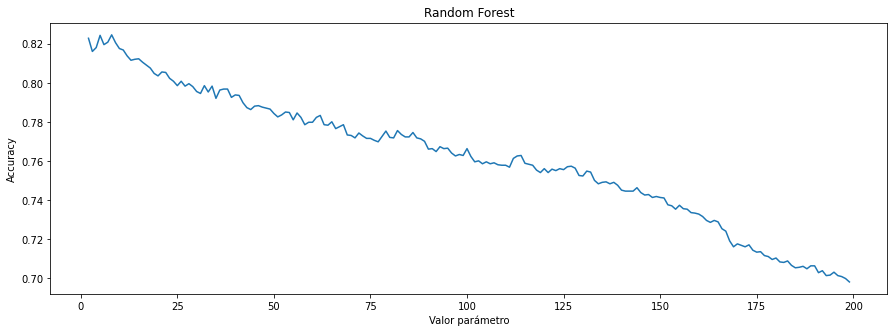

In [58]:
tune_forest_1(200)

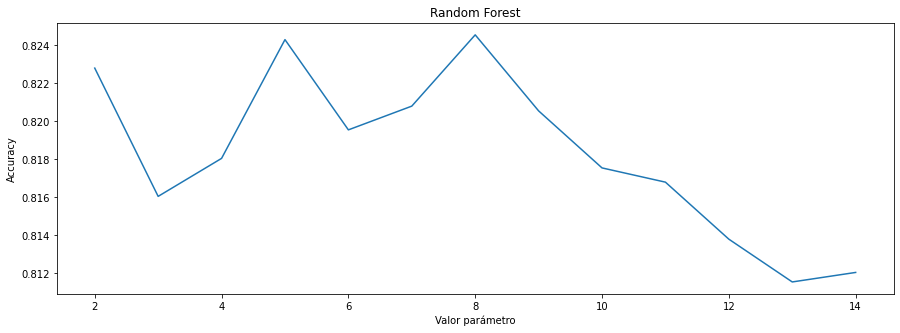

In [59]:
tune_forest_1(15)

In [60]:
forest=RandomForestClassifier(min_samples_split=8,random_state=10)
cross_validation(forest,df_train_norm,df_train_obj,True)

Accuracy:  0.8245411985018727


0.8245411985018727

In [61]:
#Para el parámetro max_depth
def tune_forest_2(max_value):
    acc=[]
    for i in range(2,max_value):
        forest=RandomForestClassifier(max_depth=i,random_state=10)
        acc.append(cross_validation(forest,df_train_norm,df_train_obj))

    fig, ax =plt.subplots(figsize=(15,5))
    ax.plot(range(2,max_value), acc)
    ax.set_title('Random Forest')
    ax.set_xlabel('Valor parámetro')
    ax.set_ylabel('Accuracy')
    plt.show()

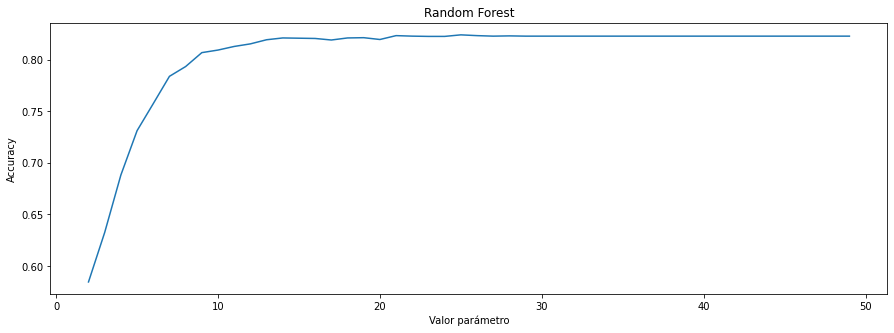

In [62]:
tune_forest_2(50)

In [104]:
forest=RandomForestClassifier(max_depth=20,random_state=10)
cross_validation(forest,df_train_norm,df_train_obj,True)

Accuracy:  0.8195424469413233


0.8195424469413233

In [64]:
#Para el parámetro max_leaf_nodes
def tune_forest_3(max_value):
    acc=[]
    for i in range(2,max_value):
        forest=RandomForestClassifier(max_leaf_nodes=i,random_state=10)
        acc.append(cross_validation(forest,df_train_norm,df_train_obj))

    fig, ax =plt.subplots(figsize=(15,5))
    ax.plot(range(2,max_value), acc)
    ax.set_title('Random Forest')
    ax.set_xlabel('Valor parámetro')
    ax.set_ylabel('Accuracy')
    plt.show()

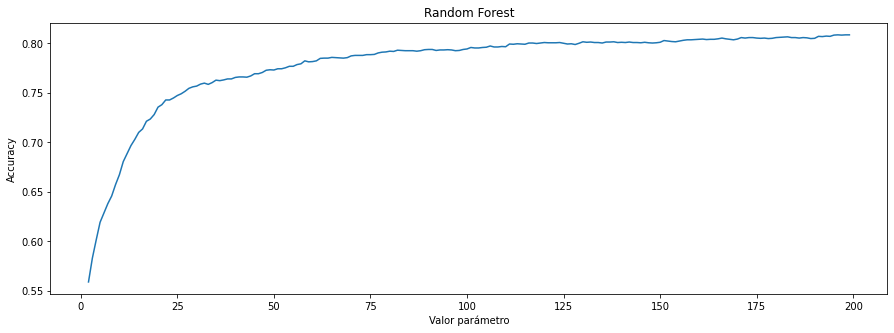

In [65]:
tune_forest_3(200)

In [106]:
forest=RandomForestClassifier(max_leaf_nodes=300,random_state=10)
cross_validation(forest,df_train_norm,df_train_obj,True)

Accuracy:  0.8147933832709114


0.8147933832709114

In [66]:
#Para el parámetro min_samples_leaf
def tune_forest_4(max_value):
    acc=[]
    for i in range(2,max_value):
        forest=RandomForestClassifier(min_samples_leaf=i,random_state=10)
        acc.append(cross_validation(forest,df_train_norm,df_train_obj))

    fig, ax =plt.subplots(figsize=(15,5))
    ax.plot(range(2,max_value), acc)
    ax.set_title('Random Forest')
    ax.set_xlabel('Valor parámetro')
    ax.set_ylabel('Accuracy')
    plt.show()

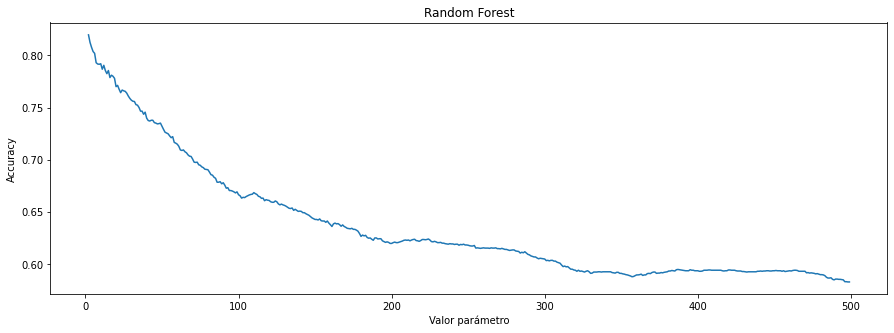

In [67]:
tune_forest_4(500)

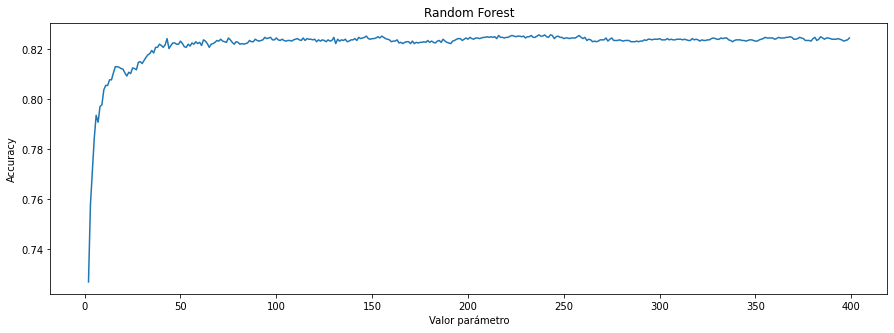

In [71]:
#Para el parámetro n_estimators
def tune_forest_5(max_value):
    acc=[]
    for i in range(2,max_value):
        forest=RandomForestClassifier(n_estimators=i,min_samples_split=8,random_state=10)
        acc.append(cross_validation(forest,df_train_norm,df_train_obj))

    fig, ax =plt.subplots(figsize=(15,5))
    ax.plot(range(2,max_value), acc)
    ax.set_title('Random Forest')
    ax.set_xlabel('Valor parámetro')
    ax.set_ylabel('Accuracy')
    plt.show()
tune_forest_5(400)

In [110]:
print("Número de árboles = 200")
forest=RandomForestClassifier(n_estimators=200,min_samples_split=8,random_state=10)
cross_validation(forest,df_train_norm,df_train_obj,True)
print("Número de árboles = 100")
forest=RandomForestClassifier(n_estimators=100,min_samples_split=8,random_state=10)
cross_validation(forest,df_train_norm,df_train_obj,True)
print("Número de árboles = 300")
forest=RandomForestClassifier(n_estimators=300,min_samples_split=8,random_state=10)
cross_validation(forest,df_train_norm,df_train_obj,True)

Número de árboles = 200
Accuracy:  0.8240405742821473
Número de árboles = 100
Accuracy:  0.8245411985018727
Número de árboles = 300
Accuracy:  0.82429088639201


0.82429088639201

### Aplicación al conjunto de test

In [118]:
forest=RandomForestClassifier(n_estimators=100,min_samples_split=8,random_state=10)
forest.fit(df_train_norm,df_train_obj)
pred=forest.predict(df_test_norm)
ids=df_test_orig["id"]

df_result = pd.DataFrame({'id': ids, 'Precio_cat': pred})
df_result.to_csv("resultados_2.csv", index=False)

In [119]:
df_result.head()

,id,Precio_cat
0,4820,5
1,4821,2
2,4822,2
3,4823,3
4,4824,2
